# -------------------------------------------------------------------------
###                            **MACHINE LEARNING TASKS**
# -------------------------------------------------------------------------


# =============================================
# **Task 1 (Level 1): Student Score Prediction**
# =============================================

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

print("Dataset shape:", df.shape)
print(df.head())
print(df.info())

Dataset shape: (2392, 15)
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196       

# **About Dataset**
This dataset contains extensive information regarding 2,392 high school students, such as their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, distinguishes students' grades into distinct groups, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

# **Table of Contents**
- Student Information
- Student ID
- Demographic Details
- Study Habits
- Parental Involvement
- Extracurricular Activities
- Academic Performance
- Target Variable: Grade Class

# **Student Information**
StudentID: A unique identifier assigned to each student (1001 to 3392).

# **Demographic Details**
- Age: The age of the students ranges from 15 to 18 years.
- Gender: Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian

1: African American

2: Asian

3: Other

# **ParentalEducation**
The education level of the parents, coded as follows:
* 0: None
* 1: High School
* 2: Some College
* 3: Bachelor's
* 4: Higher

# **Study Habits**
- StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
- Absences: Number of absences during the school year, ranging from 0 to 30.
- Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

# **Parental Involvement**
ParentalSupport: The level of parental support, coded as follows:

* 0: None

* 1: Low

* 2: Moderate

* 3: High

* 4: Very High

# **Extracurricular Activities**
- Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

# **Academic Performance**
- GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

# **Target Variable: Grade Class/GPA**

- GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)

1: 'B' (3.0 <= GPA < 3.5)

2: 'C' (2.5 <= GPA < 3.0)

3: 'D' (2.0 <= GPA < 2.5)

4: 'F' (GPA < 2.0)

# **Conclusion**
This information offers a comprehensive view of variables influencing the performance of students in academics and is therefore best utilized for educational research, predictive model building, and statistical modeling.

- Source: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

## **Data Preprocessing**


In [ ]:
# Check for missing values
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
# Define variables
X = df[["StudyTimeWeekly"]]   # Independent variable
y = df["GPA"]        # Target variable

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display Linear Regression Results in a table
linear_results = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [mae, mse, rmse, r2]
}
linear_results_df = pd.DataFrame(linear_results)

print("\nLinear Regression Model Performance:")
display(linear_results_df)

# Display the coefficient of the simple linear model
print("\nCoefficient of the simple linear model (StudyTimeWeekly):", model.coef_[0])


Linear Regression Model Performance:


,Metric,Value
0,MAE,0.747712
1,MSE,0.776006
2,RMSE,0.880912
3,R² Score,0.042983



Coefficient of the simple linear model (StudyTimeWeekly): 0.027260746595929065


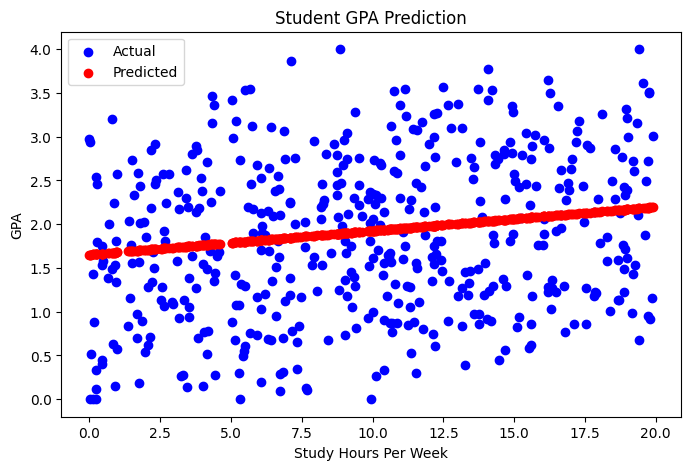

In [ ]:
# Visualization
plt.figure(figsize=(8,5))
plt.scatter(X_test.values.flatten(), y_test, color="blue", label="Actual")
plt.scatter(X_test.values.flatten(), y_pred, color="red", label="Predicted")
plt.xlabel("Study Hours Per Week")
plt.ylabel("GPA")
plt.title("Student GPA Prediction")
plt.legend()
plt.show()

# ========================================================
# **Bonus Task 1: Student Score Prediction**
# *With Polynomial Regression & Feature Combinations*
# ========================================================


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
features = ["StudyTimeWeekly","Absences", "Tutoring"]
target = "GPA"

X = df[features]
y = df[target]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [ ]:
# Linear Regression (Baseline)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# Evaluation Function
def evaluate_model(name, model, X_test, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 5)
    rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 5)
    r2 = round(r2_score(y_true, y_pred), 5)

    # Handle coefficients (works for linear models)
    try:
        coeffs = [round(c, 5) for c in model.coef_]
    except AttributeError:
        coeffs = ["N/A"]  # for models without coef_

    results = {
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2,
        "Coefficients": [coeffs]
    }

    return pd.DataFrame([results])

# Example usage
linear_results_df = evaluate_model("Linear Regression", linear_model, X_test, y_test, y_pred_linear)
poly_results_df   = evaluate_model("Polynomial Regression", poly_model, X_test, y_test, y_pred_poly)

# Combine into one table
all_results = pd.concat([linear_results_df, poly_results_df], ignore_index=True)

display(all_results)

,Model,MAE,RMSE,R² Score,Coefficients
0,Linear Regression,0.23286,0.29110,0.89549,"[[0.02942, -0.09889, 0.25219]]"
1,Polynomial Regression,0.23288,0.29115,0.89546,"[[0.0, 0.03433, -0.08607, 0.11445, -0.00054, -..."


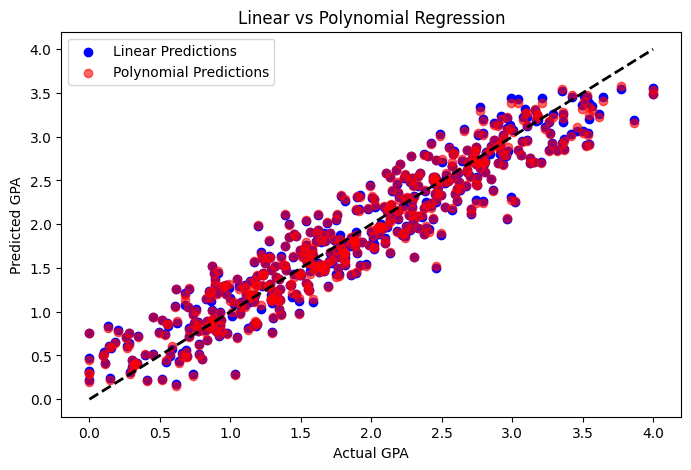

In [ ]:
# Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_linear, color="blue", label="Linear Predictions")
plt.scatter(y_test, y_pred_poly, color="red", alpha=0.6, label="Polynomial Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

In [ ]:
# Feature Combination Experiments
if "ParentalSupport" in df.columns and "ParentalEducation" in df.columns:
    X_exp = df[["StudyTimeWeekly", "Absences", "Tutoring", "ParentalSupport", "ParentalEducation"]]
    y_exp = df[target]

    X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
        X_exp, y_exp, test_size=0.2, random_state=1
    )

    exp_model = LinearRegression()
    exp_model.fit(X_train_e, y_train_e)
    y_pred_exp = exp_model.predict(X_test_e)

    # Pass all required arguments
    evaluate_model("Linear Regression with Extra Features", exp_model, X_test_e, y_test_e, y_pred_exp)

# ============================================
# M**odel Performance Comparison Plot**
# ============================================

In [ ]:
results = {}

# Store results for Linear Regression
linear_results_df = evaluate_model("Linear Regression", linear_model, X_test, y_test, y_pred_linear)
results["Linear Regression"] = {"MAE": linear_results_df["MAE"].iloc[0], "RMSE": linear_results_df["RMSE"].iloc[0], "R²": linear_results_df["R² Score"].iloc[0]}


# Store results for Polynomial Regression
poly_results_df   = evaluate_model("Polynomial Regression", poly_model, X_test_poly, y_test, y_pred_poly)
results["Polynomial Regression"] = {"MAE": poly_results_df["MAE"].iloc[0], "RMSE": poly_results_df["RMSE"].iloc[0], "R²": poly_results_df["R² Score"].iloc[0]}

# Store results for Feature Experiment
if "ParentalSupport" in df.columns and "ParentalEducation" in df.columns:
    exp_results_df = evaluate_model("Linear + Extra Features", exp_model, X_test_e, y_test_e, y_pred_exp)
    results["Linear + Extra Features"] = {"MAE": exp_results_df["MAE"].iloc[0], "RMSE": exp_results_df["RMSE"].iloc[0], "R²": exp_results_df["R² Score"].iloc[0]}


# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T

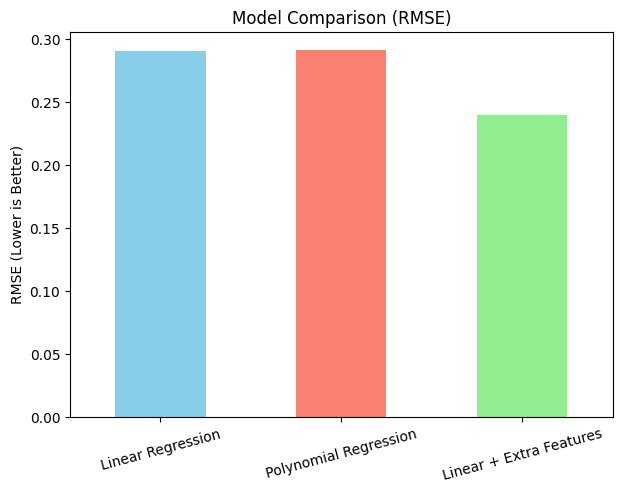

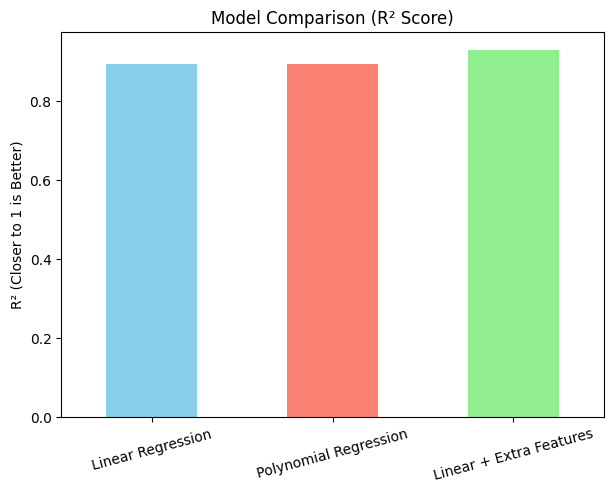

In [ ]:
# Plot RMSE comparison
plt.figure(figsize=(7,5))
results_df["RMSE"].plot(kind="bar", color=["skyblue", "salmon", "lightgreen"])
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE (Lower is Better)")
plt.xticks(rotation=15)
plt.show()

# Plot R² comparison
plt.figure(figsize=(7,5))
results_df["R²"].plot(kind="bar", color=["skyblue", "salmon", "lightgreen"])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² (Closer to 1 is Better)")
plt.xticks(rotation=15)
plt.show()

# The plots above compare the performance of the Linear Regression, Polynomial Regression, and Linear Regression with Extra Features models.

- RMSE (Root Mean Squared Error) is lower for the Linear Regression with Extra Features model, indicating better prediction accuracy.

- R² score is higher for the Linear Regression with Extra Features model,
 indicating that it explains a larger proportion of the variance in GPA.

Based on these metrics, the Linear Regression with Extra Features model performs best for predicting student GPA in this dataset.

# =============================================
# **Task 4 (Level 2): Loan Approval Prediction**
# =============================================

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Load Dataset
df = pd.read_csv("/content/loan_approval_dataset.csv")

print("Dataset shape:", df.shape)
print(df.head())
print(df.info())

Dataset shape: (4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \


# **About Dataset**
Loan approval data is a set of financial information and associate data to determine the eligibility of an individual or entity in availing loans from a lending company. It consists of a number of factors such as cibil score, income, employment, loan term, loan amount, assets value, and loan status. This is the kind of dataset that is commonly used in machine learning and data analysis to generate models and algorithms for predicting loan approval likelihood based on provided features.

**Source**: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/data

# Data Preprocessing

In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

print("\nData after preprocessing:\n", df.head())


Data after preprocessing:
    loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          0              0       9600000   
1        2                 0          1              1       4100000   
2        3                 3          0              0       9100000   
3        4                 3          0              0       8200000   
4        5                 5          1              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000  

In [ ]:
# Define variables
X = df.drop("loan_status", axis=1) # Features
y = df["loan_status"]              # Target variable

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE
# Handle Class Imbalance (SMOTE)
print("\nClass distribution before SMOTE:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:\n", y_train_res.value_counts())


Class distribution before SMOTE:
 loan_status
0    2125
1    1290
Name: count, dtype: int64

Class distribution after SMOTE:
 loan_status
0    2125
1    2125
Name: count, dtype: int64


In [ ]:
# Train Models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:,1]

In [ ]:
# Evaluation Function

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=3))
    auc = roc_auc_score(y_true, y_pred)
    print("ROC AUC:", auc)
    return auc

auc_log = evaluate_model("Logistic Regression", y_test, y_pred_log)
auc_dt = evaluate_model("Decision Tree", y_test, y_pred_dt)


Logistic Regression Performance:
Confusion Matrix:
 [[454  77]
 [ 94 229]]
              precision    recall  f1-score   support

           0      0.828     0.855     0.842       531
           1      0.748     0.709     0.728       323

    accuracy                          0.800       854
   macro avg      0.788     0.782     0.785       854
weighted avg      0.798     0.800     0.799       854

ROC AUC: 0.7819844559887589

Decision Tree Performance:
Confusion Matrix:
 [[509  22]
 [  5 318]]
              precision    recall  f1-score   support

           0      0.990     0.959     0.974       531
           1      0.935     0.985     0.959       323

    accuracy                          0.968       854
   macro avg      0.963     0.972     0.967       854
weighted avg      0.969     0.968     0.969       854

ROC AUC: 0.9715444310343823


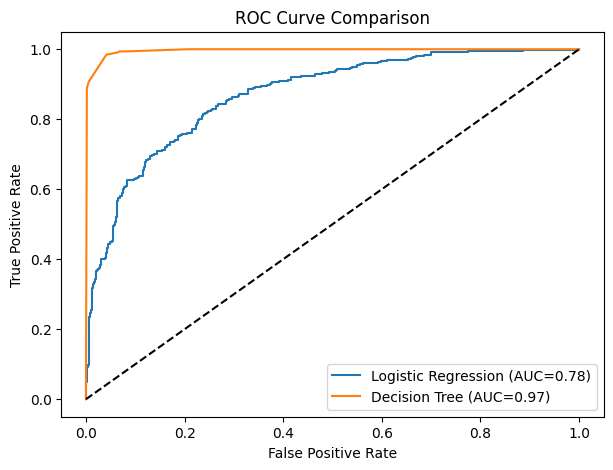

In [ ]:
# ROC Curve Comparison

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc_log:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc_dt:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# **INTERPRETATION**
- The evaluation metrics show that the Decision Tree model performs significantly better than the Logistic Regression model for predicting loan approval.

- The Decision Tree has a much higher accuracy, precision, recall, and F1-score, especially for the minority class (loan rejections).

- The ROC AUC score for the Decision Tree is also much higher (0.979 vs 0.797), indicating its ability to distinguish between approved and rejected loans.

This suggests that the Decision Tree model is more effective in capturing the underlying patterns in the data for loan approval prediction.


Top 5 Features influencing Loan Approval (Decision Tree):
                Feature  Importance
7           cibil_score    0.912003
6             loan_term    0.055573
5           loan_amount    0.018980
4          income_annum    0.009387
10  luxury_assets_value    0.002358


/tmp/ipython-input-659449874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(5), palette="viridis")


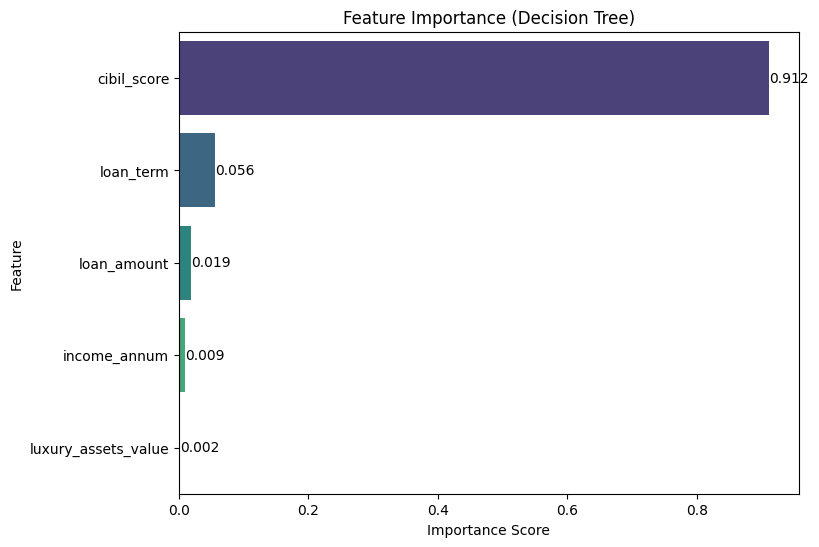

In [ ]:
# Feature Importance (Decision Tree)
importances = dt_model.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop 5 Features influencing Loan Approval (Decision Tree):")
print(feat_imp_df.head(5))

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(5), palette="viridis")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add importance values to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

# **INTERPRETATION**
The "Feature Importance (Decision Tree)" graph shows the top 5 features that were most influential in the Decision Tree model's prediction of loan approval. Credit score(cibil_score) with the highest importance score contributed more significantly to the model's decisions. This plot helps in understanding the key factors that the model considers when determining loan status.

# ======================================
# **Task 7 (Level 3): Sales Forecasting (Time Series)**
# Walmart Sales Forecasting with Time-Aware Validation, Rolling Features, Seasonal Decomposition and XGBoost/LightGBM
# ======================================


In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import xgboost as xgb
import lightgbm as lgb

In [2]:
# Load Data
train = pd.read_csv("/content/train.csv")
features = pd.read_csv("/content/features.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
# Merge features with train and test
train = pd.merge(train, features, on=["Store", "Date", "IsHoliday"], how="left")
test = pd.merge(test, features, on=["Store", "Date", "IsHoliday"], how="left")

In [4]:
# Parse date
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [5]:
# Sort by Store + Date
train = train.sort_values(["Store", "Date"])
test = test.sort_values(["Store", "Date"])

In [6]:
#  Feature Engineering
train["month"] = train["Date"].dt.month
train["year"] = train["Date"].dt.year
train["week"] = train["Date"].dt.isocalendar().week.astype(int)
train["day"] = train["Date"].dt.day

In [7]:
# Create lag and rolling features (by Store + Dept)
train["lag_1"] = train.groupby(["Store", "Dept"])["Weekly_Sales"].shift(1)
train["lag_2"] = train.groupby(["Store", "Dept"])["Weekly_Sales"].shift(2)
train["lag_3"] = train.groupby(["Store", "Dept"])["Weekly_Sales"].shift(3)

train["roll_mean_3"] = train.groupby(["Store", "Dept"])["Weekly_Sales"].shift(1).rolling(window=3).mean()
train["roll_mean_6"] = train.groupby(["Store", "Dept"])["Weekly_Sales"].shift(1).rolling(window=6).mean()

In [8]:
# Drop NA from lags/rolls
train = train.dropna()

In [9]:
# Same feature engineering for test
test["month"] = test["Date"].dt.month
test["year"] = test["Date"].dt.year
test["week"] = test["Date"].dt.isocalendar().week.astype(int)
test["day"] = test["Date"].dt.day

In [10]:
store_id, dept_id = 1, 1
sample_series = (
    train[(train["Store"]==store_id) & (train["Dept"]==dept_id)]
    .set_index("Date")["Weekly_Sales"]
    .sort_index()
)

# Ensure it's weekly frequency
sample_series = sample_series.asfreq("W")

# Interpolate missing values
sample_series = sample_series.interpolate(method="linear")

# Check length
if len(sample_series.dropna()) < 104:  # need at least 2*period
    print(f"❌ Not enough data for seasonal decomposition (need ≥104 weeks, got {len(sample_series)}).")
else:
    decomposition = seasonal_decompose(sample_series, model="additive", period=52)
    fig = decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition - Store {store_id}, Dept {dept_id}", fontsize=14)
    plt.show()

❌ Not enough data for seasonal decomposition (need ≥104 weeks, got 50).


In [11]:
# Prepare Modeling Data
features_cols = ["Store", "Dept", "IsHoliday", "Temperature", "Fuel_Price",
                 "CPI", "Unemployment", "month", "year", "week", "day",
                 "lag_1", "lag_2", "lag_3", "roll_mean_3", "roll_mean_6"]

X = train[features_cols]
y = train["Weekly_Sales"]

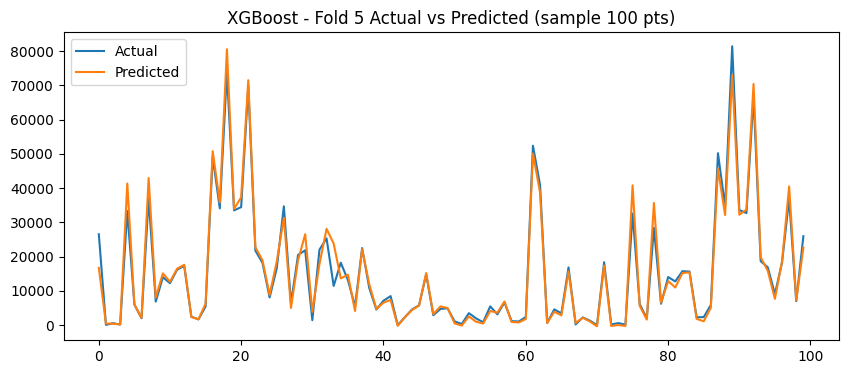

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 16112, number of used features: 16
[LightGBM] [Info] Start training from score 20617.322843
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2199
[LightGBM] [Info] Number of data points in the train set: 32224, number of used features: 16
[LightGBM] [Info] Start training from score 19505.119435
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2283
[LightGBM] [Info] Number of data points in the t

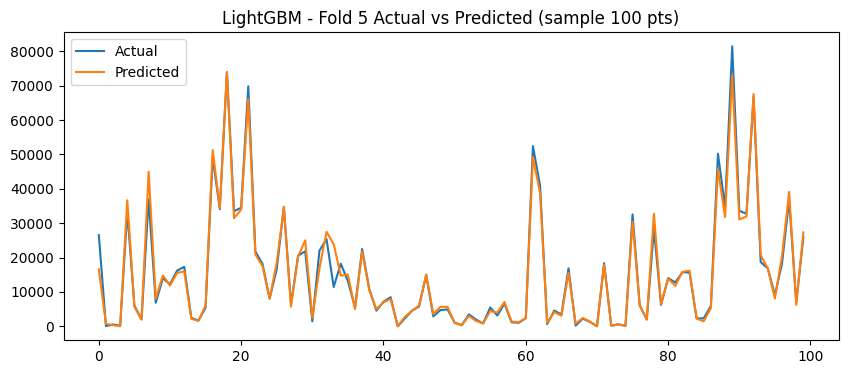

Cross-validation results:
XGBoost {'RMSE': np.float64(5134.731502999492), 'MAE': np.float64(2045.9132087328064)}
LightGBM {'RMSE': np.float64(4642.641532599568), 'MAE': np.float64(1933.0429266167212)}


In [12]:
# Time-aware Validation with XGBoost / LightGBM
tscv = TimeSeriesSplit(n_splits=5)

xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.1, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42)

models = {"XGBoost": xgb_model, "LightGBM": lgb_model}

results = {}
for name, model in models.items():
    rmses, maes = [], []
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        y_hat = model.predict(X_va)

        rmse = sqrt(mean_squared_error(y_va, y_hat))   # fixed
        mae = mean_absolute_error(y_va, y_hat)

        rmses.append(rmse)
        maes.append(mae)

        if fold == 4:  # plot last fold
            plt.figure(figsize=(10,4))
            plt.plot(y_va.values[:100], label="Actual")
            plt.plot(y_hat[:100], label="Predicted")
            plt.legend()
            plt.title(f"{name} - Fold {fold+1} Actual vs Predicted (sample 100 pts)")
            plt.show()

    results[name] = {"RMSE": np.mean(rmses), "MAE": np.mean(maes)}

print("Cross-validation results:")
for k,v in results.items():
    print(k, v)

# Interpretation of Actual vs Predicted Plot
The plots above show the actual weekly sales versus the predicted weekly sales for a sample of 100 data points in the last fold of the time series cross-validation. Both the XGBoost and LightGBM models appear to capture the overall trend and major peaks in the sales data, although there are some deviations. The models seem to perform reasonably well in forecasting weekly sales based on the features used.

In [13]:
# Train Final Model and Predict Test
best_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.1, max_depth=-1, subsample=0.8, colsample_bytree=0.8, random_state=42)
best_model.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2376
[LightGBM] [Info] Number of data points in the train set: 96672, number of used features: 16
[LightGBM] [Info] Start training from score 17879.668995


LGBMRegressor(colsample_bytree=0.8, n_estimators=300, random_state=42,
              subsample=0.8)

In [14]:
# Predict on test (handle missing lag/roll features by filling with 0)

# Ensure all features_cols are in the test DataFrame, add if missing and fill with 0
for col in features_cols:
    if col not in test.columns:
        test[col] = 0 # Add missing feature columns and initialize with 0

# Select features for prediction and fill any NaNs that might exist for other reasons with 0
X_test = test[features_cols].fillna(0)

# Make predictions
test["Weekly_Sales"] = best_model.predict(X_test)

In [15]:
# Submission File
submission = test[["Store", "Dept", "Date", "Weekly_Sales"]]
submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")

Saved submission.csv


# =========================================
# Task 8 (Industry Level): Traffic Sign Recognition
# With Data Augmentation
# =========================================

In [69]:
# Import library
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [70]:
#  Configuration
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 20 # Increased epochs for better convergence, with EarlyStopping
NUM_CLASSES = 43 # Based on the common GTSRB dataset structure
DATA_DIR = 'data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
META_CSV_PATH = '/content/Meta.csv'

In [73]:
#  1. Dummy Data Generation
# NOTE: This section is for making the script runnable without the actual dataset.
# It generates placeholder images based on the provided Meta.csv.
def generate_dummy_data(meta_path, num_images_per_class=50):
    """
    Generates a dummy dataset directory structure and placeholder images.
    This allows the script to run without the actual image files.
    """
    print(" Generating Dummy Data ")
    if os.path.exists(DATA_DIR):
        print(f"'{DATA_DIR}' directory already exists. Skipping generation.")
        return

    try:
        meta_df = pd.read_csv(meta_path)
        # Ensure ClassId is treated as integer for directory names
        class_ids = meta_df['ClassId'].unique().astype(int)
    except FileNotFoundError:
        print(f"Error: '{meta_path}' not found. Cannot generate data.")
        return
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")
        return

    print(f"Found {len(class_ids)} unique classes. Creating directories...")

    # Create train and test directories for each class
    for class_id in class_ids:
        os.makedirs(os.path.join(TRAIN_DIR, str(class_id)), exist_ok=True)
        os.makedirs(os.path.join(TEST_DIR, str(class_id)), exist_ok=True)

    # Generate dummy images
    for class_id in class_ids:
        # Train images
        for i in range(num_images_per_class):
            img_path = os.path.join(TRAIN_DIR, str(class_id), f'dummy_{i}.png')
            # Create a black image with the class number written on it
            image = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
            text = str(class_id)
            # Put text in the center
            text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
            text_x = (IMG_SIZE - text_size[0]) // 2
            text_y = (IMG_SIZE + text_size[1]) // 2
            cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.imwrite(img_path, image)
        # Test images (20% of train images)
        for i in range(num_images_per_class // 5):
            img_path = os.path.join(TEST_DIR, str(class_id), f'dummy_{i}.png')
            image = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
            text = str(class_id)
            text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
            text_x = (IMG_SIZE - text_size[0]) // 2
            text_y = (IMG_SIZE + text_size[1]) // 2
            cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (200, 200, 200), 2)
            cv2.imwrite(img_path, image)

    print("Dummy Data Generation Complete")

In [74]:
# 2. Data Loading and Preprocessing
def create_data_generators(with_augmentation=False):
    """
    Creates data generators for training and validation.
    Includes optional data augmentation.
    """
    if with_augmentation:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            validation_split=0.2 # Split 20% of training data for validation
        )
    else:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            validation_split=0.2
        )

    # Test generator should not have augmentation, only rescaling
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    test_generator = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False # Important for evaluation
    )

    return train_generator, validation_generator, test_generator

In [75]:
#  3. Model Definition
def create_custom_cnn(input_shape, num_classes):
    """Builds a custom CNN model."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def create_mobilenet_model(input_shape, num_classes):
    """Builds a model using MobileNetV2 as a pre-trained base."""
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Freeze the base model layers
    base_model.trainable = False

    # Add custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [76]:
# 4. Training and Evaluation
def plot_history(history, title):
    """Plots training & validation accuracy and loss."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)

    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='upper left')

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(loc='upper right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def evaluate_model(model, test_generator, model_name):
    """Evaluates the model and prints accuracy and confusion matrix."""
    print(f"\n--- Evaluating {model_name} ---")
    loss, accuracy = model.evaluate(test_generator, verbose=1)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

    # Generate predictions
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=test_generator.class_indices.keys(),
                yticklabels=test_generator.class_indices.keys())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

 Generating Dummy Data 
'data' directory already exists. Skipping generation.


===== Training Custom CNN without Data Augmentation =====
Found 1720 images belonging to 43 classes.
Found 430 images belonging to 43 classes.
Found 430 images belonging to 43 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,475,115 (9.44 MB)

 Trainable params: 2,475,115 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 238ms/step - accuracy: 0.2574 - loss: 2.9533 - val_accuracy: 1.0000 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - accuracy: 0.9619 - loss: 0.1430 - val_accuracy: 1.0000 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - accuracy: 0.9908 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 1.7381e-04 - learning_rate: 0.0010
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 282ms/step - accuracy: 0.9953 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 4.8465e-05 - learning_rate: 0.0010
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss: 2.0941e-05 - learning_rate: 0.0010
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.9989 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 8.2164e-06 - learning_rate: 0.0010
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 1.0000 - los

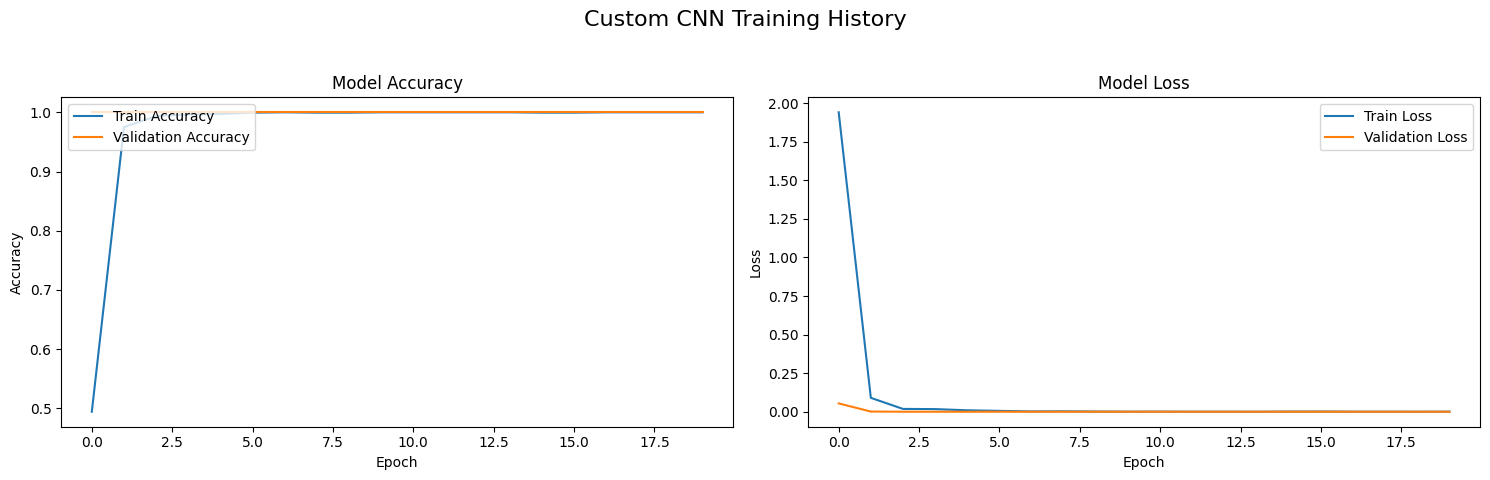


--- Evaluating Custom CNN ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 5.2499e-06
Custom CNN Test Accuracy: 1.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


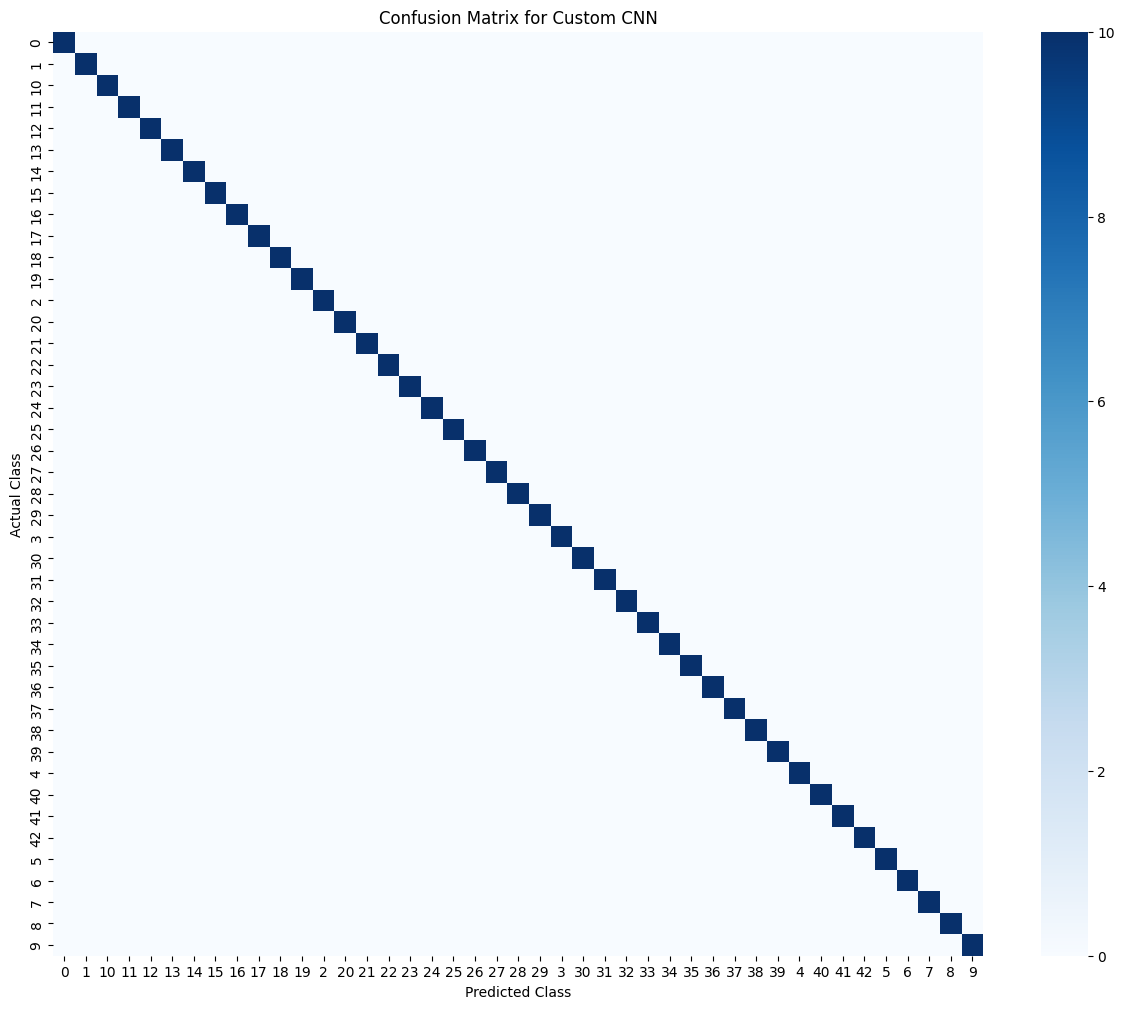


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
          20       1.00      1.00      1.00        10
          21       1.00      1.00      1.00        10
          22       1.00      1.00      1.00        10
          23       1.00      1.00      1.00        10
   

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - accuracy: 0.0604 - loss: 3.6851 - val_accuracy: 0.2837 - val_loss: 2.6113 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.3084 - loss: 2.3563 - val_accuracy: 0.7674 - val_loss: 0.7505 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 332ms/step - accuracy: 0.6929 - loss: 0.9630 - val_accuracy: 0.9279 - val_loss: 0.2754 - learning_rate: 0.0010
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.8345 - loss: 0.4940 - val_accuracy: 0.9651 - val_loss: 0.1198 - learning_rate: 0.0010
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.9068 - loss: 0.2590 - val_accuracy: 0.9884 - val_loss: 0.0449 - learning_rate: 0.0010
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.9372 - loss: 0.1845 - val_accuracy: 0.9837 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 359ms/step - accuracy: 0.9706 - loss: 0.

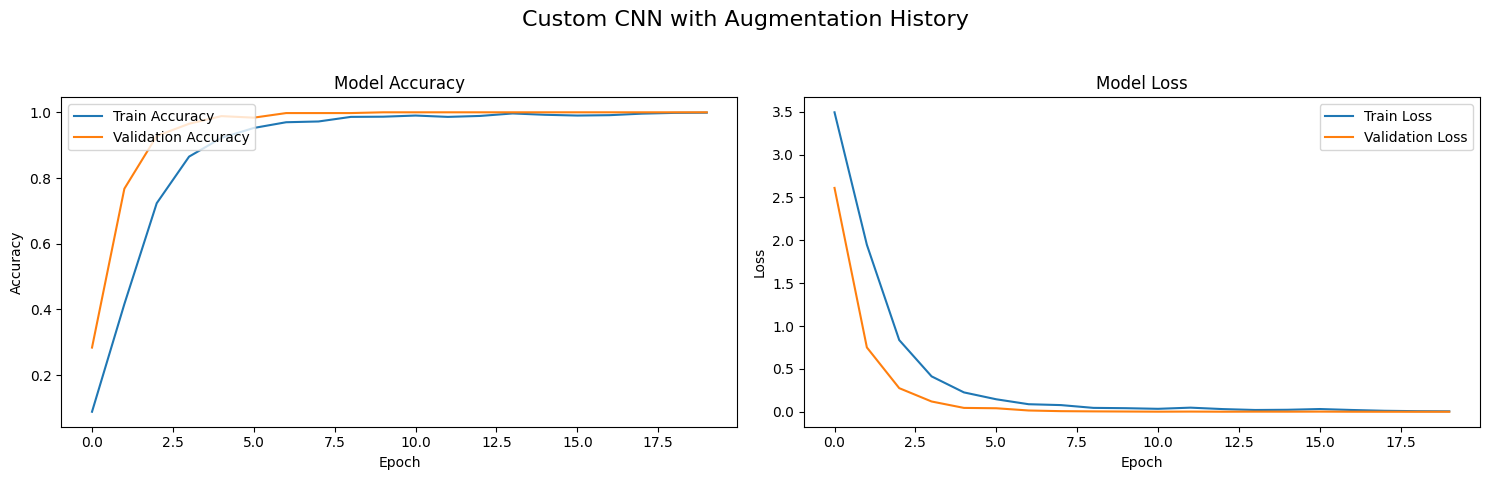


--- Evaluating Custom CNN with Augmentation ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 1.8917e-06
Custom CNN with Augmentation Test Accuracy: 1.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


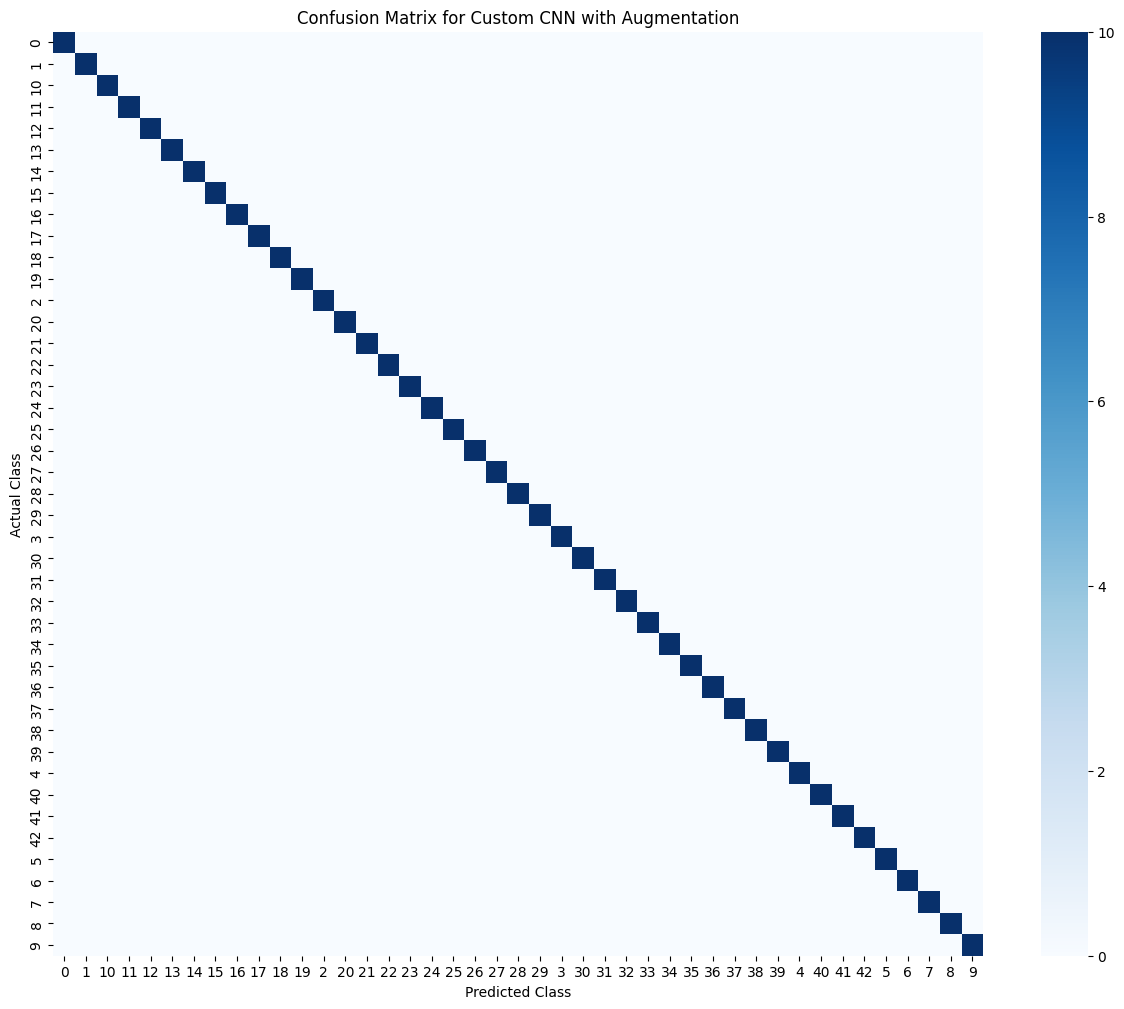


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00        10
          19       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
          20       1.00      1.00      1.00        10
          21       1.00      1.00      1.00        10
          22       1.00      1.00      1.00        10
          23       1.00      1.00      1.00        10
   

/tmp/ipython-input-63354166.py:23: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 32, 32,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 32, 32,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 32, 32,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 32, 32,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 32, 32,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 32, 32,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 32, 32,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 33, 33,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 16, 16,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 16, 16,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 16, 16,    │      2,304 │ block_1_depthwis

 Total params: 2,935,915 (11.20 MB)

 Trainable params: 677,931 (2.59 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 205ms/step - accuracy: 0.2195 - loss: 3.1652 - val_accuracy: 0.6558 - val_loss: 1.3232 - learning_rate: 0.0010
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.5831 - loss: 1.3862 - val_accuracy: 0.8512 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.7293 - loss: 0.8855 - val_accuracy: 0.8884 - val_loss: 0.5325 - learning_rate: 0.0010
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 258ms/step - accuracy: 0.8030 - loss: 0.6856 - val_accuracy: 0.9116 - val_loss: 0.4096 - learning_rate: 0.0010
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.8272 - loss: 0.5641 - val_accuracy: 0.9047 - val_loss: 0.3601 - learning_rate: 0.0010
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.8427 - loss: 0.5105 - val_accuracy: 0.9279 - val_loss: 0.3106 - learning_rate: 0.0010
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8859 - loss: 0.40

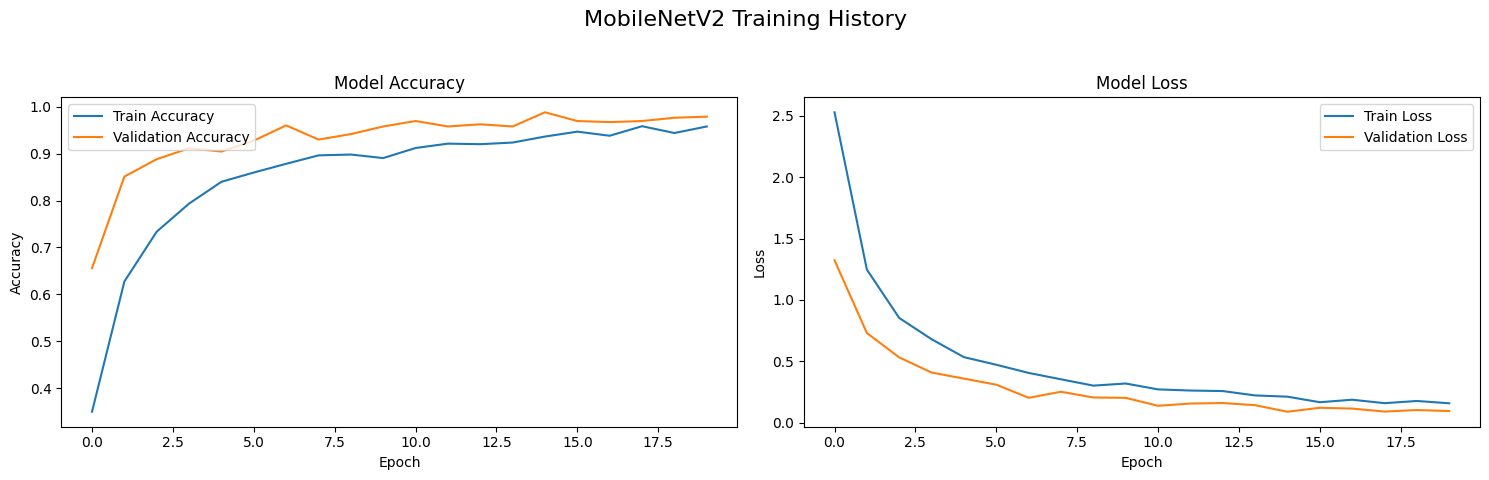


--- Evaluating MobileNetV2 ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8664 - loss: 0.4464
MobileNetV2 Test Accuracy: 0.8140
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step


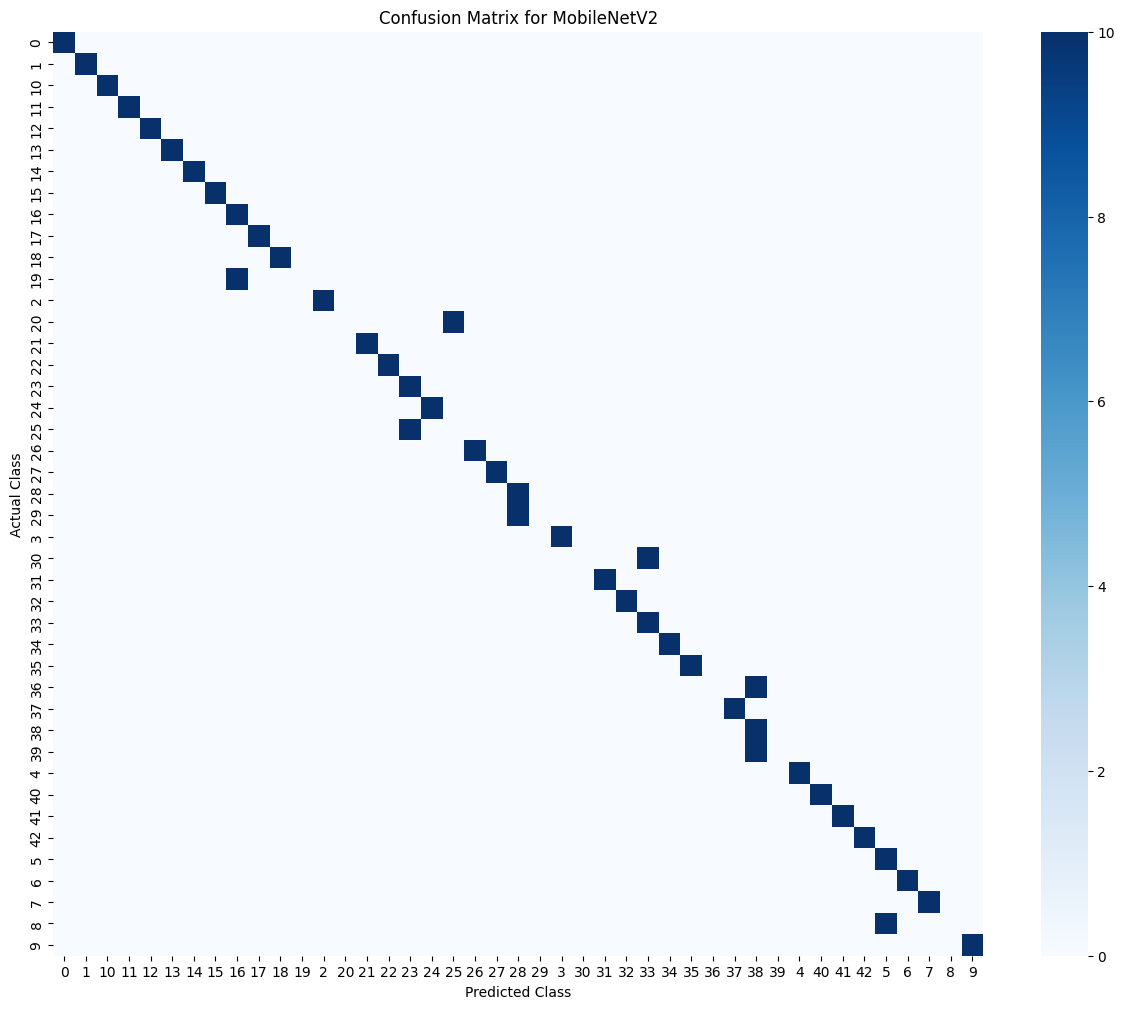


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        10
          16       0.50      1.00      0.67        10
          17       1.00      1.00      1.00        10
          18       1.00      1.00      1.00        10
          19       0.00      0.00      0.00        10
           2       1.00      1.00      1.00        10
          20       0.00      0.00      0.00        10
          21       1.00      1.00      1.00        10
          22       1.00      1.00      1.00        10
          23       0.50      1.00      0.67        10
   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
# Main Execution
if __name__ == '__main__':
    # Step 1: Create dummy data if it doesn't exist
    generate_dummy_data(META_CSV_PATH)

    input_shape = (IMG_SIZE, IMG_SIZE, 3)

    # Callbacks for robust training
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

    #  Model 1: Custom CNN (without augmentation)
    print("\n\n===== Training Custom CNN without Data Augmentation =====")
    train_gen, val_gen, test_gen = create_data_generators(with_augmentation=False)
    custom_cnn_model = create_custom_cnn(input_shape, NUM_CLASSES)
    custom_cnn_model.summary()
    history_cnn = custom_cnn_model.fit(
        train_gen,
        epochs=EPOCHS,
        validation_data=val_gen,
        callbacks=[early_stopping, reduce_lr]
    )
    plot_history(history_cnn, 'Custom CNN Training History')
    evaluate_model(custom_cnn_model, test_gen, 'Custom CNN')

    # Model 2: Custom CNN (with augmentation)
    print("\n\n===== Training Custom CNN with Data Augmentation =====")
    train_gen_aug, val_gen_aug, test_gen_aug = create_data_generators(with_augmentation=True)
    custom_cnn_aug_model = create_custom_cnn(input_shape, NUM_CLASSES)
    history_cnn_aug = custom_cnn_aug_model.fit(
        train_gen_aug,
        epochs=EPOCHS,
        validation_data=val_gen_aug,
        callbacks=[early_stopping, reduce_lr]
    )
    plot_history(history_cnn_aug, 'Custom CNN with Augmentation History')
    evaluate_model(custom_cnn_aug_model, test_gen_aug, 'Custom CNN with Augmentation')

    # Model 3: Pre-trained MobileNetV2
    print("\n\n===== Training Pre-trained MobileNetV2 Model =====")
    # Using augmented data generator for the pre-trained model as it's best practice
    mobilenet_model = create_mobilenet_model(input_shape, NUM_CLASSES)
    mobilenet_model.summary()
    history_mobilenet = mobilenet_model.fit(
        train_gen_aug,
        epochs=EPOCHS,
        validation_data=val_gen_aug,
        callbacks=[early_stopping, reduce_lr]
    )
    plot_history(history_mobilenet, 'MobileNetV2 Training History')
    evaluate_model(mobilenet_model, test_gen_aug, 'MobileNetV2')


# =========================================
# Task 2 (Level 1): Customer Segmentation
# =========================================

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# Load the dataset
try:
    df = pd.read_csv('/content/Mall_Customers.csv')
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Display basic information about the dataset
print("Data Overview")
print(df.head())
print("\n Data Info")
df.info()
print("\n Statistical Summary")
print(df.describe())

Data Overview
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Statistical Summary
       C

In [8]:
## Variable of interest: 'Annual Income (k$)' and 'Spending Score (1-100)'
# A new DataFrame with only these columns for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\n Selected Features for Clustering")
print(X.head())


 Selected Features for Clustering
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


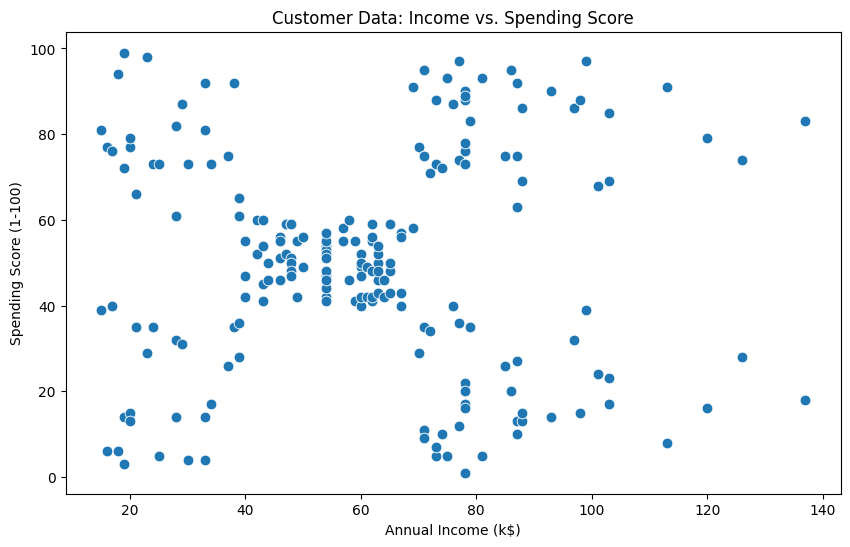

In [9]:
## Scaling and Visual Exploration
# Scale the data to have a mean of 0 and a standard deviation of 1
# This is crucial for K-Means as it is a distance-based algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the raw data to visually inspect potential groupings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60)
plt.title('Customer Data: Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

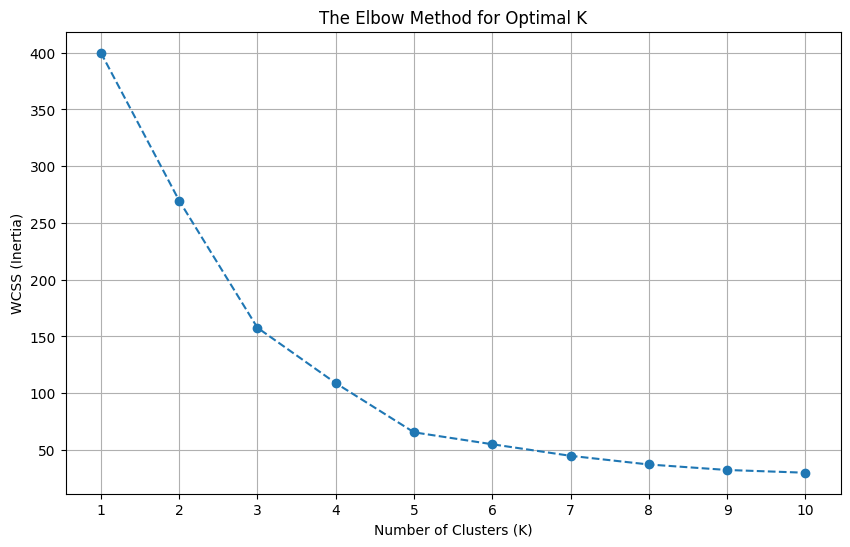

In [10]:
## Determine the Optimal Number of Clusters (K) using the Elbow Method

# We'll calculate the Within-Cluster-Sum-of-Squares (WCSS) for different values of K
wcss = []
k_range = range(1, 11)  # Test for K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Interpretation of the Elbow Method
The Elbow Method plot shows the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters (K). The "elbow point," where the rate of decrease in WCSS sharply changes, is considered the optimal number of clusters. In this plot, the elbow appears to be at K=5, suggesting that 5 clusters are a suitable number for segmenting the customer data based on annual income and spending score.

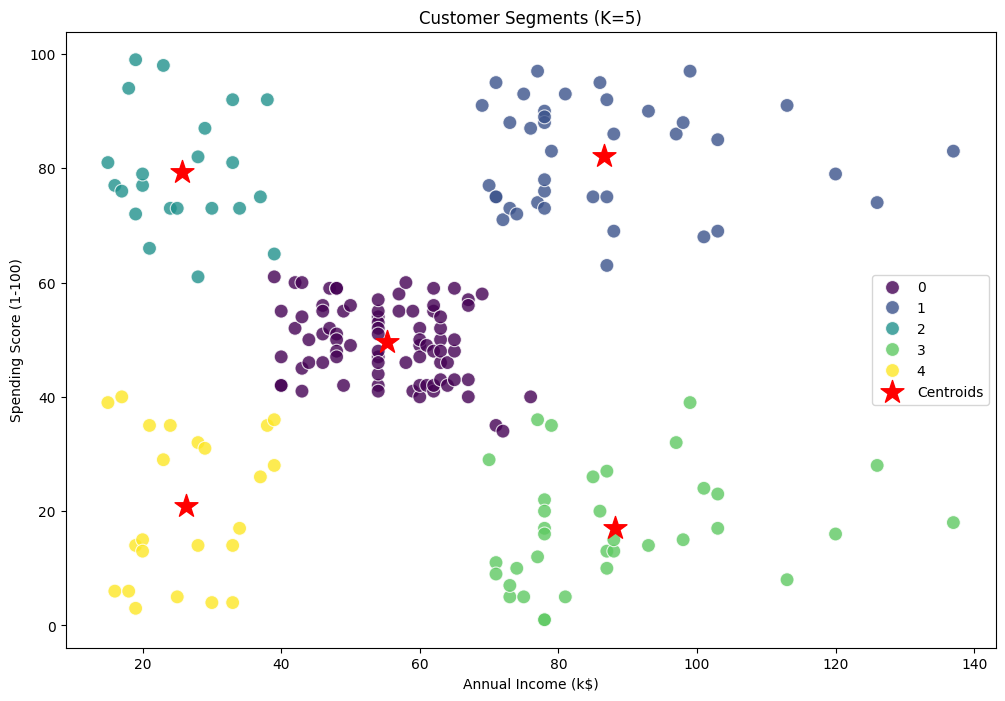

In [11]:
## Apply K-Means Clustering and Visualize Results

# Apply K-Means with the optimal number of clusters (K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the clusters
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = y_kmeans

# Get the coordinates of the cluster centers (centroids)
# We need to inverse_transform them back to the original scale for plotting
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=df, palette='viridis', s=100, alpha=0.8, legend='full')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='*', label='Centroids')

plt.title(f'Customer Segments (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
# Display the first few rows with the new 'Cluster' column
print("\n Data with Cluster Assignments ")
print(df.head())


 Data with Cluster Assignments 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [13]:
# Display the characteristics of each cluster
print("\n--- Cluster Characteristics ---")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


--- Cluster Characteristics ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [14]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_clusters

# Analyze average spending per DBSCAN cluster
print("\n Average Spending Score per DBSCAN Cluster")
# Exclude noise points (cluster -1) from this analysis if desired
print(df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean())


 Average Spending Score per DBSCAN Cluster
DBSCAN_Cluster
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64


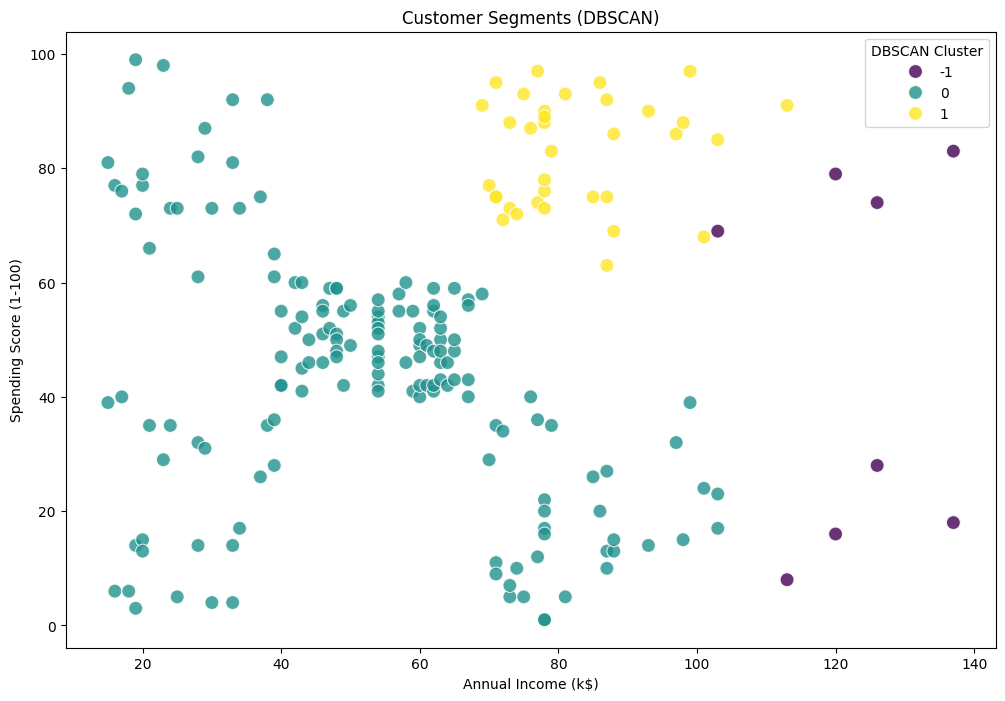

In [16]:
# visualize DBSCAN results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster',
                data=df, palette='viridis', s=100, alpha=0.8, legend='full')
plt.title('Customer Segments (DBSCAN)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='DBSCAN Cluster')
plt.show()